<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/3.0/" target="_blank">Attribution-ShareAlike 3.0 International (CC BY-SA 3.0) license</a>.</sub></div>
<h1>Curs d'Òptica en Python <span style="font-size:10px;"> <i>Jupyter notbooks collection by <a href="https://webgrec.ub.edu/webpages/000004/ang/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://campusvirtual.ub.edu/my" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/ub_logo-01.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/opticaUB/material_classe/blob/main/21_propagation.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/opticaUB/material_classe/blob/main/21_propagation.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/opticaUB/material_classe/main/21_propagation.ipynb"  target="_blank"
          download="02_Training">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

## 2. Òptica electromagnètica

### 2.5 Medis anisotrops

In [1]:
# %matplotlib widget
import os

import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib
from time import sleep

from ipywidgets import interact, FloatSlider, IntSlider, widgets, Button, \
                       Output, HBox, VBox, Dropdown, Checkbox
from IPython.display import display, clear_output

Sigui el camp incident 

\begin{equation}
\vec{E} = (E_x, E_y, 0)
\end{equation}

amb les components $E_x\,,\,E_y \in \mathbb{C}$,
l'el·lipse de polarització queda determinada per la relació d'amplituds $A_i=|E_i|$ i la diferencia de fases de les components.

Es pot dibuixar l'el·lipse de polarització com la trajectòria que descriu el vector camp elèctric, 
mitjançant $N_s$ punts en un espai 2D, on les coordenades $x$ i $y$ d'aquests punts 
corresponen a la part real dels camps, i.e. $\mathrm{real}(E_x)$ i $\mathrm{real}(E_y)$, respectivament.
Per obtenir els $N_s$ punts, tan sols cal multiplicar cada component per un factor $\exp(i\,t)$
on $i$ és la unitat imaginaria i el conjunts de $N_s$ parametres adimensionals $t=\left[\,0\,,\,2\pi\,\right)$
representa el temps normalitzat amb el periode.

Afegim també una fletxa des del centre fins el punt $xy$ inicial per represntar el vector camp elèctric.

A més, fem un degradat en la transparència dels punts (alpha) per tal de donar una sensació de moviment.

In [2]:
def ellipse_step(Ex, Ey, color, time, ax, Ex_pre=None, Ey_pre=None, alpha_F=0):
    
    samples = 15

    x = [np.real(Ex * np.exp(1j * (t+time))) 
         for t in np.linspace(2*np.pi, 0.25*np.pi, samples)]
    
    y = [np.real(Ey * np.exp(1j * (t+time))) 
         for t in np.linspace(2*np.pi, 0.25*np.pi, samples)]
    
    if Ex_pre is not None and Ey_pre is not None:
        # Dibuixem una el·lipse extra en cas que ens donin les dades
        #  representa l'el·lipse que hi havia abans del polaritzador
        
        x_pre = [np.real(Ex_pre * np.exp(1j * (t+time))) 
                 for t in np.linspace(0, 2*np.pi, samples)]
        
        y_pre = [np.real(Ey_pre * np.exp(1j * (t+time))) 
                 for t in np.linspace(0, 2*np.pi, samples)]
        
        ax.scatter(x_pre[0], y_pre[0], color=[0, 0, 0])
        ax.plot(x_pre, y_pre, 'k-', alpha=0.5)
        ax.plot([x_pre[0], x[0]], [y_pre[0], y[0]], 'k--', alpha=0.5)
        
        alpha_F = alpha_F * np.pi / 180
        ax.arrow(-1.15*np.cos(alpha_F), -1.15*np.sin(alpha_F), 
                 2.3*np.cos(alpha_F), 2.3*np.sin(alpha_F), ls='--',
                 width=0.01, head_width=0.1, alpha=0.2)
        ax.add_patch(plt.Circle((0, 0), 1.05, color='k', ls='--',
                                fill=False, alpha=0.2))
    
    # Dibuixar els punts
    ax.scatter(x, y, 
               color=color, 
               alpha=np.linspace(1, 0, samples))
    
    ax.arrow(0, 0, x[0], y[0],
             length_includes_head=True,
             width=0.01, head_width=0.1)
    
    ax.axis([-1.2, 1.2, -1.2, 1.2])
    ax.set_aspect('equal', 'box')

<hr>

L'aplicació d'un polaritzador lineal amb eix de polarització $\hat{e}_P = \left(\cos\alpha\,,\, \sin\alpha \,,\, 0\right)$ sobre un camp incident $\vec{E}$ es modelitza de la seguent manera

\begin{equation}
\vec{E}_P = \left( \vec{E} \cdot \hat{e}_P \right)\, \hat{e}_P = \left( E_{x} \cos\alpha + E_{y} \sin\alpha \right)
\begin{pmatrix}
\cos\alpha \\
\sin\alpha \\
0
\end{pmatrix}
\end{equation}

sent $\vec{E}_P$ el camp resultant. Com que tant $\hat{e}_P = \left(\cos\alpha\,,\, \sin\alpha \,,\, 0\right)$ és de modul constant i igual a la unitat, l'amplitud d'aquesta ona emergent del polaritzador és

\begin{equation}
A_P = \left( E_{x} \cos\alpha + E_{y} \sin\alpha \right)
\end{equation}

In [3]:
def apply_polarizer(Ex0, Ey0, alpha_deg):
    """ Applay a polarizer with angle <alpha_deg> in degrees
        to a light field with complex amplitudes <Ex0> and <Ey0>
        
        return the light field after the polarizer as (Epx, Epy)
    """
    alpha_rad = alpha_deg * np.pi / 180
    
    new_amp = Ex0 * np.cos(alpha_rad) + Ey0 * np.sin(alpha_rad)
    
    Epx = new_amp * np.cos(alpha_rad)
    Epy = new_amp * np.sin(alpha_rad)
    
    return Epx, Epy

<hr>

La diferència de camí òptic que introdueixen les làmines retardadors és

\begin{equation}
\Delta = N \, g\,(n_o - n_e) = N\,g\,\Delta n
\end{equation}

on $N$ i $g$ son el nombre i el gruix de les làmines i $n_o$ i $n_e$ els dos índexs principals de la làmina anisòtropa.

Per tant, el desfasament entre les dues components del camp és
\begin{equation}
\delta = \frac{2\pi}{\lambda} \Delta
\end{equation}

i el camp al sortir de la làmina és

\begin{equation}
\vec{E}_L = 
\begin{pmatrix}
A_x \\
A_y e^{i \delta} \\
0
\end{pmatrix}
e^{i\psi}
\end{equation}

In [4]:
def apply_waveplate(Ex0, Ey0, Ncapes, gruix, delta_n, wavelen):

        # diferencia de camí òptic entre les dues camponents
        Delta = Ncapes * gruix * delta_n  # invariant a lambda

        delta = 2 * np.pi / wavelen * Delta  # Desfasament induit -> Aquí entra la lambda
        
        ExL = Ex0
        EyL = Ey0 * np.exp(1j * delta)
        
        return Ex0, EyL, delta
    

<hr>

La intensitat d'una ona modelada com a dues amplituds complexes és

\begin{equation}
I = \frac{cn}{8\pi} \lVert \vec{E} \rVert ^2 = \frac{cn}{8\pi} (E_x\,E^{^*}_x + E_y\,E^{^*}_y)
\end{equation}

In [5]:
def get_intensity(Ex, Ey):
    return abs(Ex*np.conj(Ex) + Ey*np.conj(Ey)) * 0.5

<hr>
<hr>

Fem una funció principal per integrar-ho tot plegat

In [6]:
def main(all_widgets):

    gruix = 10e-6  # gruix del celo en SI
    
    do_pol_0 = all_widgets.children[0].children[0].value
    alpha_0 = all_widgets.children[0].children[1].value
    Ncapes = int(all_widgets.children[1].children[0].value)
    delta_n = all_widgets.children[1].children[1].value
    do_pol_F = all_widgets.children[2].children[0].value
    alpha_F = all_widgets.children[2].children[1].value
    
    init_pol_str = f"Líneal a {alpha_0:.1f}º" if do_pol_0 else "Llum Natural"

    wavelenR = 700e-9  # Red wavelenght in SI
    wavelenG = 550e-9  # Green wavelenght in SI
    wavelenB = 400e-9  # Blue wavelenght in SI
    
    colorR = [1, 0, 0]
    colorG = [0, 1, 0]
    colorB = [0, 0, 1]
    colorK = [0, 0, 0]
    
    if not do_pol_0:
        """ We deal with natural light...
        """
        False and plot_natural_ellipses(do_pol_F, alpha_F)
        
    else:
    
        # Apply the first polarizer to Natural light, modeled as circular... ask if not clear!
        Ex0, Ey0 = apply_polarizer(1, 1j, alpha_0)
        
        ExR, EyR, phR = apply_waveplate(Ex0, Ey0, Ncapes, gruix, delta_n, wavelenR)
        ExG, EyG, phG = apply_waveplate(Ex0, Ey0, Ncapes, gruix, delta_n, wavelenG)
        ExB, EyB, phB = apply_waveplate(Ex0, Ey0, Ncapes, gruix, delta_n, wavelenB)

        ExR_pre, EyR_pre = None, None
        ExG_pre, EyG_pre = None, None
        ExB_pre, EyB_pre = None, None
        
        if do_pol_F:
            
            ExR_pre, EyR_pre = ExR, EyR
            ExG_pre, EyG_pre = ExG, EyG
            ExB_pre, EyB_pre = ExB, EyB
            
            
            ExR, EyR = apply_polarizer(ExR, EyR, alpha_F)
            ExG, EyG = apply_polarizer(ExG, EyG, alpha_F)
            ExB, EyB = apply_polarizer(ExB, EyB, alpha_F)

        Rvalue = get_intensity(ExR, EyR)
        Gvalue = get_intensity(ExG, EyG)
        Bvalue = get_intensity(ExB, EyB)

        time = 0
        time_step = 15*np.pi/180

        # Bucle de animación
        while True:
#         for _ in range(20):

            clear_output(wait=True)

            fig = plt.figure(figsize=(12, 6))
            gs = fig.add_gridspec(2,4)
            axA0 = fig.add_subplot(gs[0, 0])
            axRL = fig.add_subplot(gs[0, 1])
            axGL = fig.add_subplot(gs[1, 0])
            axBL = fig.add_subplot(gs[1, 1])
            axCF = fig.add_subplot(gs[:, 2:])
            
            axA0.set_title(f"Pol. inicial: {init_pol_str}")
            axRL.set_title(f"$\delta_R = {(phR/np.pi):.2f} \pi "
                           f"= {(phR/np.pi)%(2):.2f} \pi$")
            axGL.set_title(f"$\delta_G = {(phG/np.pi):.2f} \pi = {(phG/np.pi)%(2):.2f} \pi$")
            axBL.set_title(f"$\delta_B = {(phB/np.pi):.2f} \pi = {(phB/np.pi)%(2):.2f} \pi$")
            axCF.set_title(f"$\Delta={Ncapes * gruix * delta_n*1e9:.0f}\,\mu m$"
                           f" : Composició RGB: [{Rvalue*100:.0f}, "
                           f"{Gvalue*100:.0f}, {Bvalue*100:.0f}] % ; ")
            
            axA0.text(1, -1, "Input", ha='right', size='large', weight='bold')
            axRL.text(1, -1, "R", ha='right', size='large', weight='bold')
            axGL.text(1, -1, "G", ha='right', size='large', weight='bold')
            axBL.text(1, -1, "B", ha='right', size='large', weight='bold')
            axCF.text(-0.4, 0.4, "Color Output", ha='left', size='large', weight='bold')
            
            ellipse_step(Ex0, Ey0, colorK, time, axA0)
            ellipse_step(ExR, EyR, colorR, time, axRL, ExR_pre, EyR_pre, alpha_F)
            ellipse_step(ExG, EyG, colorG, time, axGL, ExG_pre, EyG_pre, alpha_F)
            ellipse_step(ExB, EyB, colorB, time, axBL, ExB_pre, EyB_pre, alpha_F)
            
            axCF.imshow(np.array([Rvalue, Gvalue, Bvalue])[None,None,:])
            axCF.axis('off')

            plt.show()
            time += time_step

Generem uns widgets per tal de fer el programa més interactiu

In [7]:
put_Pol_0 = Checkbox(value=True, description='Afegir el Polaritzador')
alpha_0   = IntSlider(45, min=0, max=180, step=1, description=r"$\alpha_0$ (º)", disabled=False)

Ncapes  = Dropdown(options=[str(i) for i in range(10)], value='0', description='Capes:')
delta_n = FloatSlider(.110, min=0.1, max=0.15, step=0.0001, description=r"$\Delta n$", disabled=True,
                      readout_format='.3f')

put_Pol_F = Checkbox(value=False, description="Afegir l'Analitzador")
alpha_F   = IntSlider(0, min=0, max=180, step=1, description=r"$\alpha$ (º)", disabled=True)

pol0_box = VBox([put_Pol_0, alpha_0])
lami_box = VBox([Ncapes,    delta_n])
polF_box = VBox([put_Pol_F, alpha_F])

all_widgets = HBox([pol0_box, lami_box, polF_box])

# display(output_widgets)
# with output_widgets:
display(all_widgets)

# output_plots = Output()
# output_widgets = Output()

def on_change_input(change):
    widget = change.owner
    if widget == put_Pol_0:
        alpha_0.disabled = not change.new
    elif widget == Ncapes:
        delta_n.disabled = change.new == '0'
    elif widget == put_Pol_F:
        alpha_F.disabled = not change.new
    
#     display(output_plots)
#     with output_plots:
#         main(all_widgets)

put_Pol_0.observe(on_change_input, names='value')
Ncapes.observe(on_change_input, names='value')
put_Pol_F.observe(on_change_input, names='value')
alpha_0.observe(on_change_input, names='value')
delta_n.observe(on_change_input, names='value')
alpha_F.observe(on_change_input, names='value')

Fem correr la funció principal

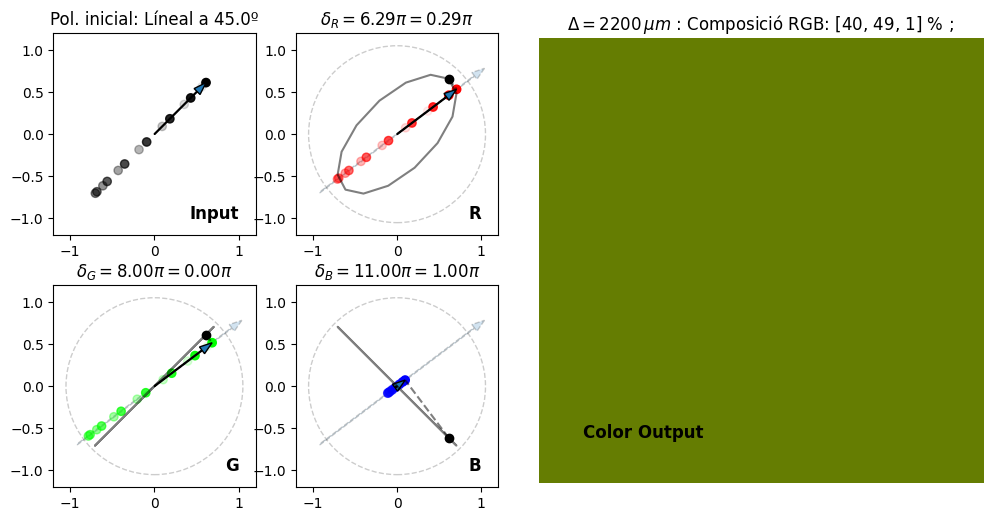

In [ ]:
try:  # dins d'un try/catch per tal d'evitar missatges molestos quan aturem repetidament el programa.
    main(all_widgets)
except:
    pass

In [ ]:
# Funció que es cridarà quan es modifiqui el valor de qualsevol widget
def on_value_change(change):
    print(f'El widget "{change["owner"].description}" ha canviat a: {change["new"]}')
    plt.figure()
    plt.plot(slider.value, slider.value)
    plt.show()

# Crear quatre widgets diferents
slider = widgets.IntSlider(value=5, min=0, max=10, step=1, description='Slider:')
dropdown = widgets.Dropdown(options=['Opció 1', 'Opció 2', 'Opció 3'], value='Opció 1', description='Dropdown:')
checkbox = widgets.Checkbox(value=False, description='Checkbox:')
text = widgets.Text(value='', description='Text:')

# Afegir la funció on_value_change com a listener per al canvi de valor de cada widget
slider.observe(on_value_change, names='value')
dropdown.observe(on_value_change, names='value')
checkbox.observe(on_value_change, names='value')
text.observe(on_value_change, names='value')

# Mostrar els widgets
display(slider, dropdown, checkbox, text)

In [ ]:
caption = widgets.Label(value='The slider value is in its initial position.')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    print('sfsdgdsg')
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

In [ ]:
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

# run this cell to dynamically update plot
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)